In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#first download the dataset from this link, you need to be logged in
# https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/download?datasetVersionNumber=1
# save it in your google drive, for this notebook this is the path /content/drive/MyDrive/Datasets/Brain_MRI_Images_for_Brain_tumor_detection/archive.zip
# make a new directory
!mkdir dataset
%cd dataset
!cp /content/drive/MyDrive/Datasets/Brain_MRI_Images_for_Brain_tumor_detection/archive.zip .
!unzip -q archive.zip

/content/dataset


In [ ]:
import pandas as pd
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
def load_data(parent_folder_path):
  path_parent = parent_folder_path + '/**'
  X=[]
  y=[]
  for path in glob.glob(path_parent, recursive=True):
    if os.path.isfile(path):
      img = cv2.imread(path)
      X.append(img)
      if os.path.basename(os.path.dirname(path)) == "yes":
        y.append(1)
      else:
        y.append(0)
  return np.array(X), np.array(y)

In [ ]:
path = "/content/dataset/brain_tumor_dataset"
X, y = load_data(path)

<ipython-input-4-fe4bf507bf0c>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


Text(0.5, 1.0, 'Distribution of ratios')

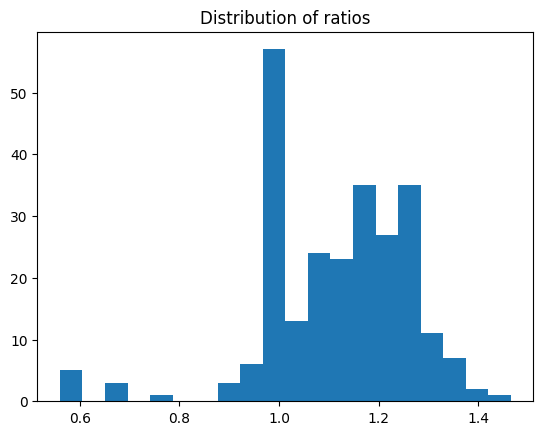

In [ ]:
#eda

#size of the images
list_sizes = []
list_ratios = []
for img in X:
  list_sizes.append(img.shape)
  list_ratios.append(img.shape[0]/img.shape[1])

# plt.hist(list_sizes)
plt.figure()
_ = plt.hist(list_ratios, bins=20)
plt.title('Distribution of ratios')

Text(0.5, 1.0, 'Classes distribution')

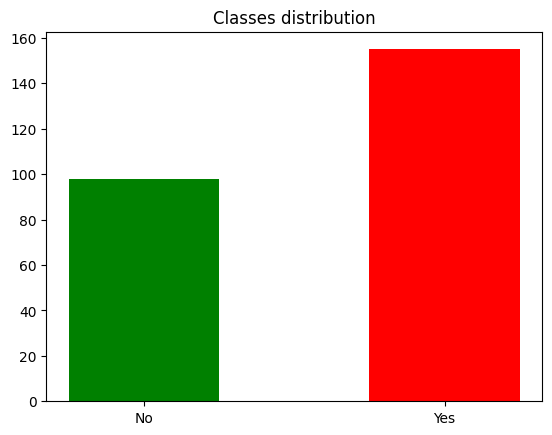

In [ ]:
#distribution of classes initial dataset
classes, counts = np.unique(y, return_counts=True)
_ = plt.bar(classes,counts,width=0.5,color=['green','red'])
_ = plt.xticks(classes, ['No','Yes'])
plt.title('Classes distribution')

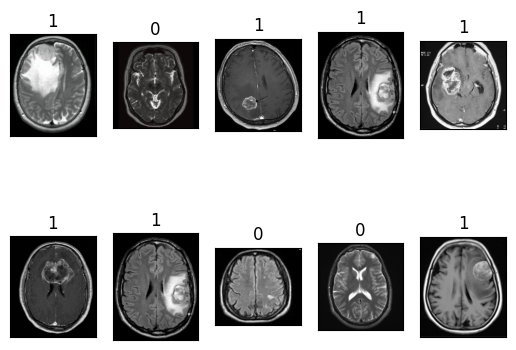

In [ ]:
#plot examples

plt.figure()
for i in range(10):
  rnd = random.randint(0,len(X))
  plt.subplot(2,5,i+1)
  plt.imshow(X[rnd])
  plt.xticks([])
  plt.yticks([])
  plt.title(y[rnd])

In [ ]:
# splitting
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

In [ ]:
#distribution of classes
dummY = [y_train, y_val, y_test]
sets_names = ['Train','Validation','Test']
countsy = []
for i,y in enumerate(dummY):
  classes, counts = np.unique(y, return_counts=True)
  countsy[sets_names[i]] = list(counts)
  # countsy.append(list(counts))

# _ = plt.bar(sets_names,countsy)
# _ = plt.xticks(classes, ['No','Yes'])

TypeError: ignored

ValueError: ignored

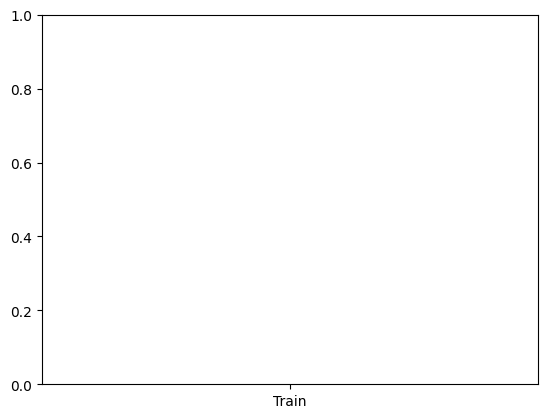

In [ ]:
plt.bar(sets_names, countsy)

In [ ]:
countsy_df = pd.DataFrame(countsy)

In [ ]:
countsy_df.plot.bar()

TypeError: ignored

In [ ]:
# preprocessing, cropping https://pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
